In [1]:
from torch_june_analyser import Analyser
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import yaml
import seaborn as sns
from collections import defaultdict
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 150
import matplotlib.pyplot as plt
from  matplotlib.colors import SymLogNorm

/cosma/home/dp004/dc-quer1/.conda/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cc = yaml.safe_load(open("../../GradABM/Data/June/best_run.yaml"))
cc["system"]["device"] = "cpu"
an = Analyser.from_parameters(cc)
an.run()

In [3]:
date = "2020-03-14"

In [4]:
dd = an.get_gradient_cases_by_location(date)

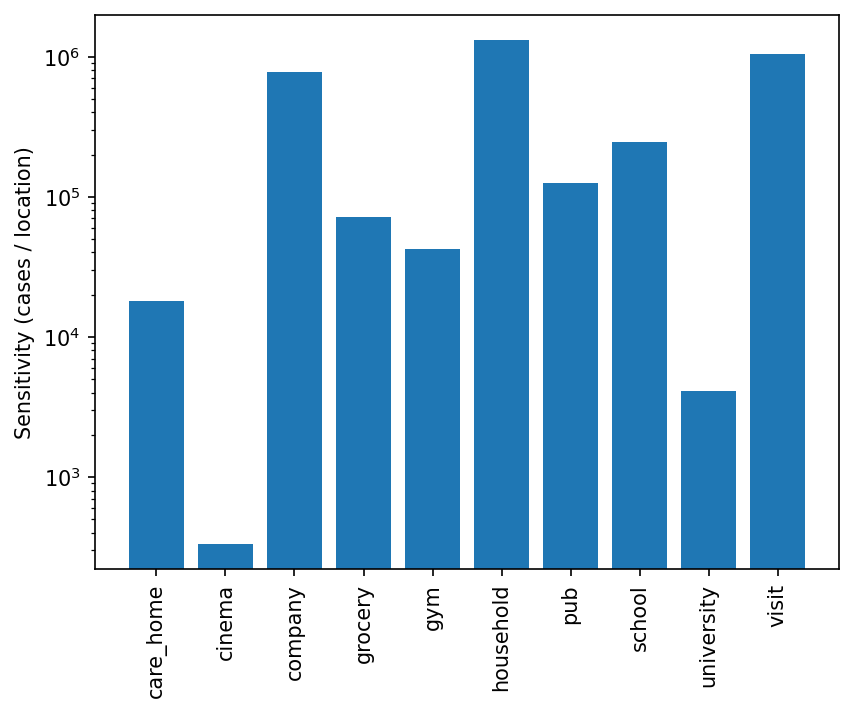

In [5]:
f, ax = plt.subplots()
ax.bar(dd.keys(), dd.values())
plt.xticks(rotation=90);
ax.set_yscale("log")
ax.set_ylabel(r"Sensitivity (cases / location)")
f.savefig("./total_sensitivity.png", dpi=150)

In [6]:
dd = an.get_gradient_deaths_by_location(date)

Text(0, 0.5, '$\\frac{\\mathrm{d}\\mathrm{deaths}_i}{\\mathrm{d}\\beta_j}$')

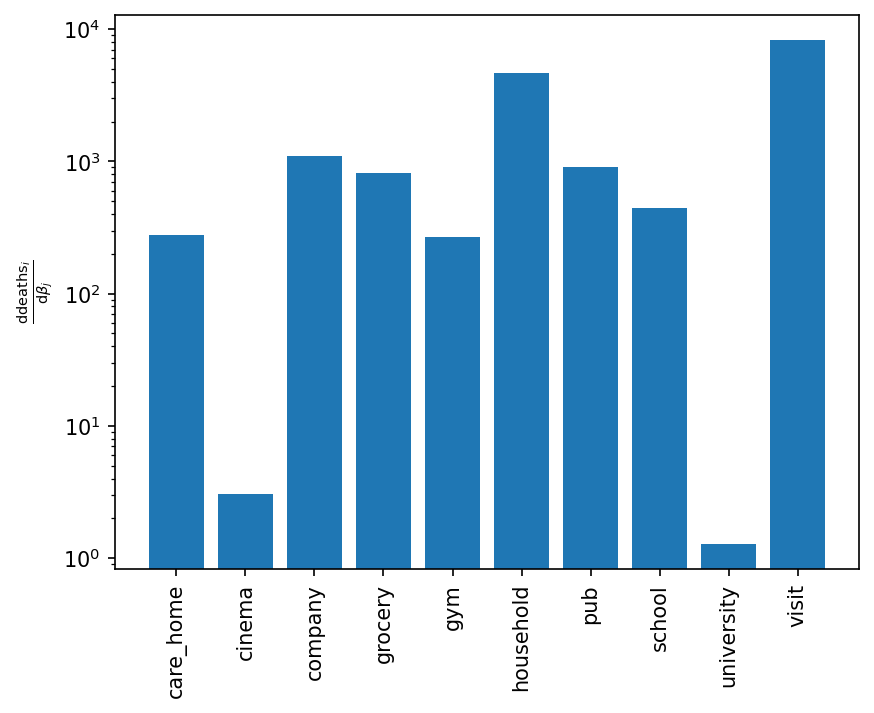

In [7]:
f, ax = plt.subplots()
ax.bar(dd.keys(), dd.values())
plt.xticks(rotation=90);
ax.set_yscale("log")
ax.set_ylabel(r"$\frac{\mathrm{d}\mathrm{deaths}_i}{\mathrm{d}\beta_j}$")


In [8]:
dd = an.get_gradient_cases_by_age_location(date)

Text(0, 0.5, 'Sensitivity (cases among 18 yo / location)')

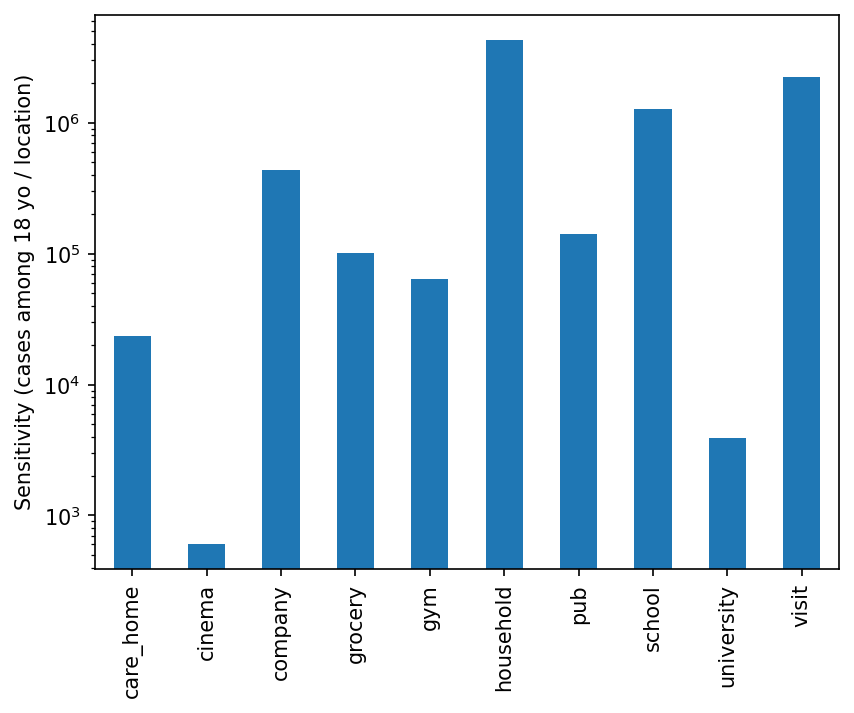

In [9]:
df = pd.DataFrame(dd)
fig, ax = plt.subplots()
df = df[18]
df.plot.bar(ax=ax)
ax.set_yscale("log")
#ax.set_ylabel(r"$\frac{\mathrm{d}\mathrm{cases}_i}{\mathrm{d}\beta_j}$")
ax.set_ylabel(r"Sensitivity (cases among 18 yo / location)")

#ax.legend(title = "People aged <", loc="center left", bbox_to_anchor=(1, 0.5))

In [10]:
dd = an.get_gradient_normalised_cases_by_age_location(date)

In [11]:
df = pd.DataFrame(dd)

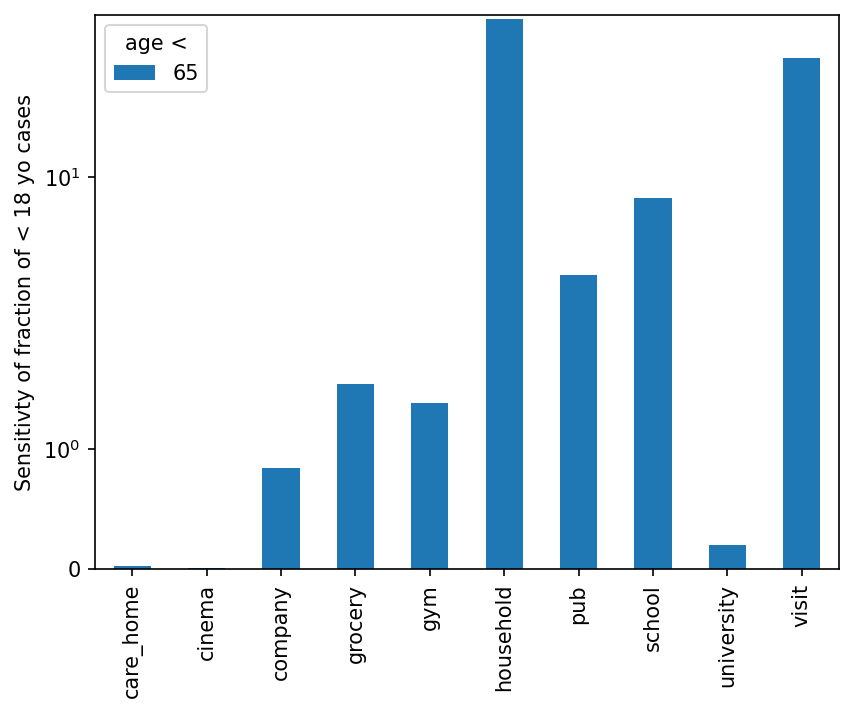

In [12]:
df = pd.DataFrame(dd)
f, ax = plt.subplots()
df = df[65]
df.plot.bar(ax=ax)
ax.legend(title="age <")
ax.set_ylabel(r"Sensitivty of fraction of < 18 yo cases")

ax.set_yscale("symlog")
#ax.set_ylabel(r"$\frac{\mathrm{d}\mathrm{cases}_i}{\mathrm{d}\beta_j}$")


In [6]:
dd = an.get_gradient_normalised_cases_by_ethnicity_location(date)

In [12]:
df = pd.DataFrame(dd)

In [54]:
df

,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4,C5,D1,D2,D3,E1,E2
care_home,0.048248,0.053195,0.053002,0.045440,0.043362,0.041744,0.039384,0.037418,0.032080,0.030809,0.029273,0.022750,0.014309,0.006832,0.008159,0.004571,0.002485,7.683411e-09
cinema,-0.000065,-0.000067,-0.000071,0.000460,0.000429,0.000425,0.000381,0.000390,0.000280,0.000229,0.000167,0.000169,0.000195,0.000133,0.000077,0.000067,0.000063,2.110028e-10
company,-0.058195,0.683452,0.674968,2.077229,1.971516,1.884333,1.793491,1.606713,1.299961,1.102142,0.826951,1.136309,0.685249,0.554659,0.432415,0.235327,-0.044310,7.264316e-07
grocery,0.007937,0.013467,0.012721,0.097593,0.092236,0.097473,0.088848,0.091374,0.063492,0.052454,0.041394,0.040011,0.037441,0.021940,0.013311,0.008626,0.005592,8.707866e-08
gym,0.047140,0.042815,0.042366,0.090983,0.086726,0.096577,0.090450,0.087854,0.065379,0.056718,0.051104,0.046766,0.040313,0.025422,0.015567,0.010325,0.005586,-3.725290e-09
household,0.285068,0.724822,0.711715,2.600923,2.526839,2.648979,2.462986,2.435620,1.801892,1.534058,1.239548,1.264126,1.156890,0.708337,0.338207,0.194404,0.094988,1.609325e-06
pub,0.121927,0.106853,0.105525,0.236350,0.223252,0.254810,0.237159,0.234723,0.171889,0.147276,0.126693,0.121075,0.110174,0.068318,0.036849,0.023525,0.012185,1.108274e-07
school,-0.071200,0.233310,0.230712,0.629642,0.633680,0.610132,0.581968,0.554064,0.397772,0.347274,0.318705,0.268336,0.203519,0.137362,0.069711,0.041765,0.034779,3.352761e-08
university,0.003468,0.002984,0.002942,0.009245,0.009867,0.009449,0.008822,0.008198,0.006376,0.005393,0.005386,0.005659,0.005272,0.003228,0.002056,0.001335,0.000896,4.481990e-09
visit,0.228702,0.189799,0.178766,1.602350,1.514012,1.580977,1.453281,1.434913,1.033534,0.858333,0.722300,0.699966,0.673215,0.390495,0.196086,0.117020,0.063001,1.542270e-06


In [13]:
#for ethn in ["A", "B", "C", "D", "E"]:
#    cols = [col for col in df.columns if col.startswith(ethn)]
#    df[ethn] = df[cols].mean(1)
#    df = df.drop(columns=cols)

In [51]:
import yaml
asd = yaml.safe_load(open("/cosma/home/dp004/dc-quer1/june/JUNE/june/configs/defaults/demography/ethnicity_encodings.yaml"))
names = []
for bb in asd:
    fine = asd[bb]
    for key in fine:
        if key == "broad":
            continue
        name = fine[key]
        if name.startswith("English"):
            name = "British White"
        if name.startswith("Irish"):
            name = "Irish White"
        names.append(name)

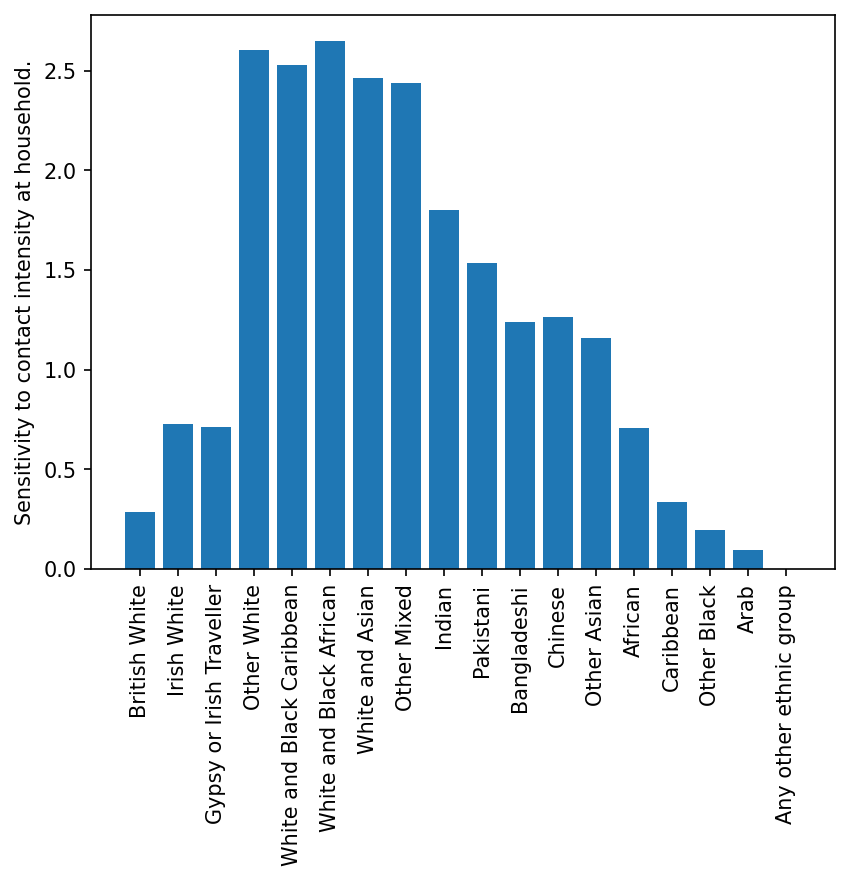

In [53]:
f, ax = plt.subplots()
ax.bar(names, df.loc["household"].values)
ax.set_ylabel("Sensitivity to contact intensity at household.")
#ax.set_xlabel("Ethnicity")
plt.xticks(rotation=90);

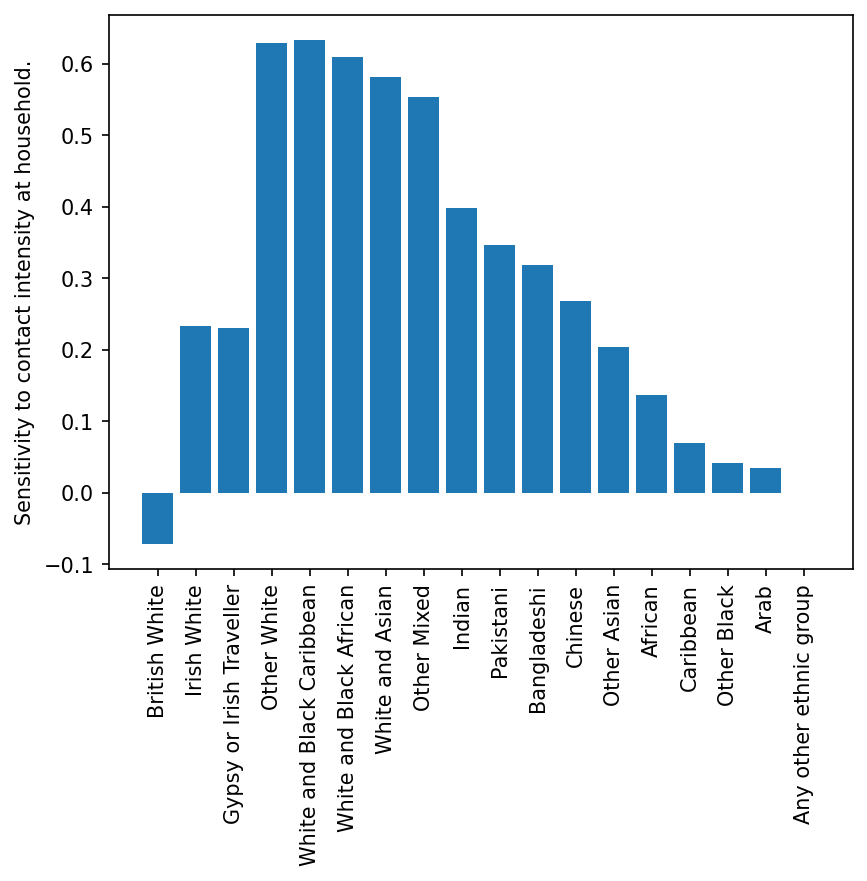

In [55]:
f, ax = plt.subplots()
ax.bar(names, df.loc["school"].values)
ax.set_ylabel("Sensitivity to contact intensity at household.")
#ax.set_xlabel("Ethnicity")
plt.xticks(rotation=90);

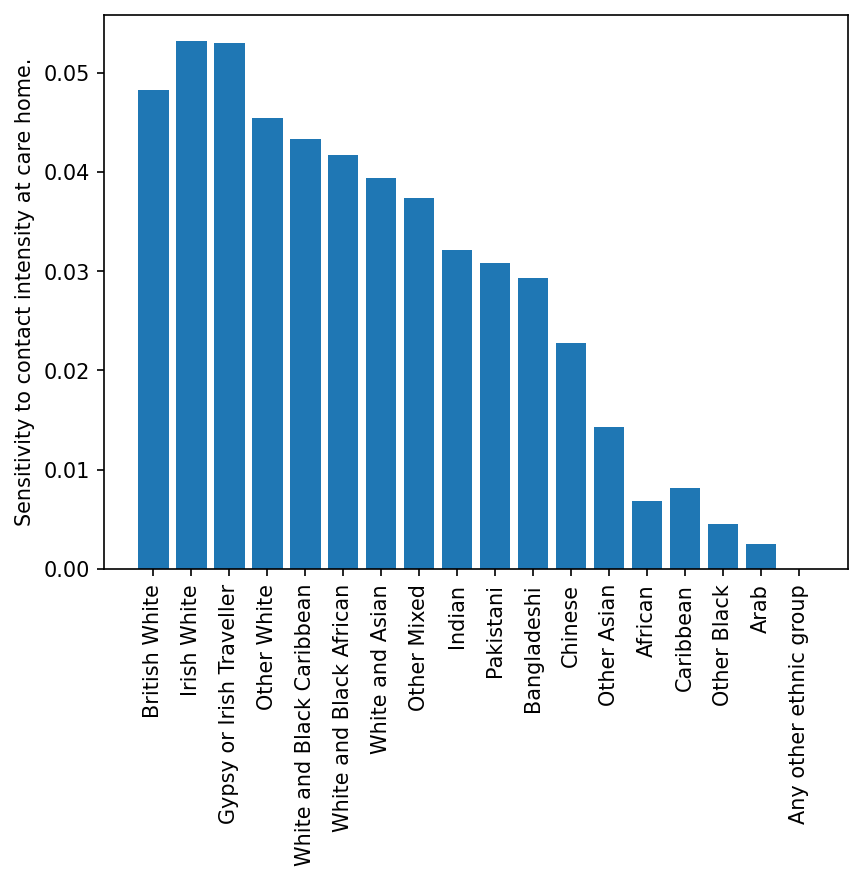

In [62]:
f, ax = plt.subplots()
ax.bar(names, df.loc["care_home"].values)
ax.set_ylabel("Sensitivity to contact intensity at care home.")
#ax.set_xlabel("Ethnicity")
plt.xticks(rotation=90);

In [4]:
newton_step = an.get_newton_step(date)

/tmp/ipykernel_234075/3208631084.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newton_step.keys(), rotation=90);


Text(0, 0.5, 'Parameter variation')

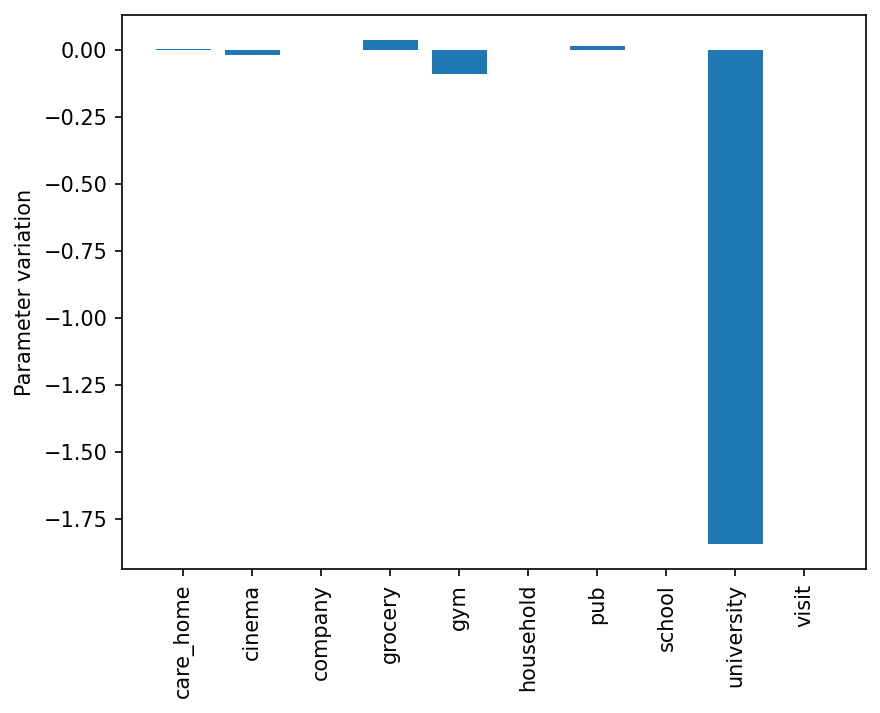

In [5]:
fig, ax = plt.subplots()
ax.bar(newton_step.keys(), newton_step.values())
ax.set_xticklabels(newton_step.keys(), rotation=90);
ax.set_ylabel("Parameter variation")

In [102]:
initial_date = "2020-03-01"
grad_per_day = defaultdict(lambda: [])
for day in range(40):
    date = datetime.strptime(initial_date, "%Y-%m-%d") + timedelta(days=day)
    date = str(date.date())
    dd = an.get_gradient_cases_by_location(date)
    total_gradient = np.sqrt(np.sum(np.array(list(dd.values()))**2))
    for key in dd:
        grad_per_day[key].append(dd[key] / total_gradient)


/tmp/ipykernel_91182/1039227143.py:9: RuntimeWarning: invalid value encountered in double_scalars
  grad_per_day[key].append(dd[key] / total_gradient)


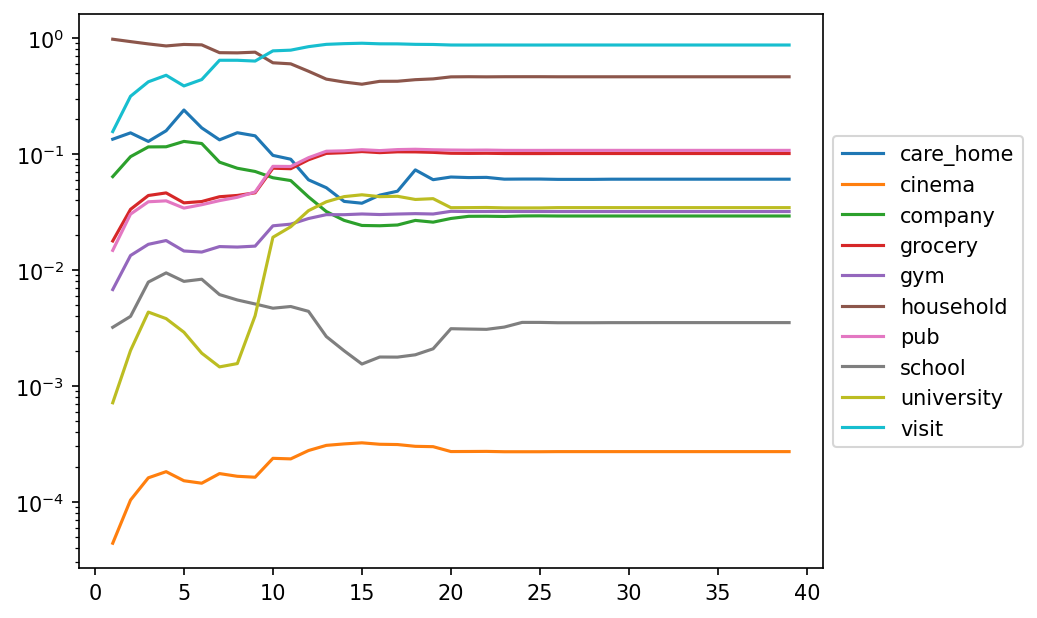

In [103]:
f, ax = plt.subplots()
for key in grad_per_day:
    ax.plot(grad_per_day[key], label = key)
ax.set_yscale("log")
ax.legend(loc="center left", bbox_to_anchor=(1,0.5))